# By liulu

# ------------------------------第十四章 Sklearn库--------------------------------

## 0.数据预处理----鸢尾花数据集

#### （1）下载数据集

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris",engine='python')

#### （2）数据集的查看

In [3]:
iris.shape

(150, 5)

In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.species.value_counts()  #查看标签值一共有几类

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

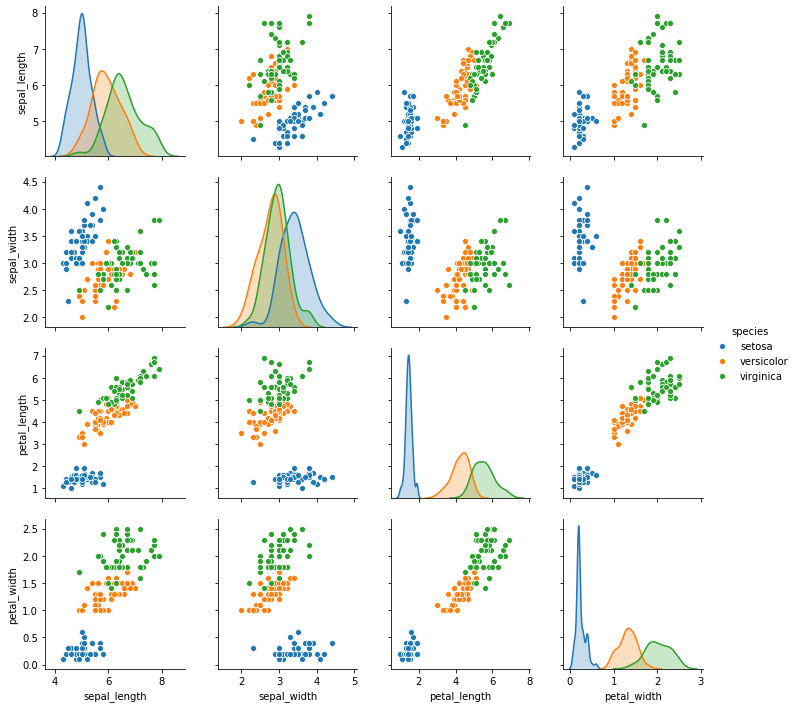

In [9]:
%matplotlib inline
sns.pairplot(data=iris,hue="species")  #求各个特征之间的相关性

#### （3）标签清洗

In [10]:
iris_simple = iris.drop(["sepal_length","sepal_width"],axis=1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


#### （4）标签编码

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"]) #将标签设置为0，1, 2样式
iris_simple

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


#### （5）数据集的标准化

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [13]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length","petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple,columns = ["petal_length","petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


#### （6）构建训练集和测试集

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple,test_size=0.2)  #0.2的数据作为测试集
test_set.head()

,petal_length,petal_width,species
27,1.5,0.2,0
75,4.4,1.4,1
41,1.3,0.3,0
14,1.2,0.2,0
51,4.5,1.5,1


In [15]:
iris_x_train = train_set[["petal_length","petal_width"]]   #将特征和标签分开
iris_x_train.head()

,petal_length,petal_width
34,1.5,0.2
53,4.0,1.3
67,4.1,1.0
147,5.2,2.0
135,6.1,2.3


In [16]:
iris_y_train = train_set["species"].copy()
iris_y_train.head()

34     0
53     1
67     1
147    2
135    2
Name: species, dtype: int32

In [17]:
iris_x_test = test_set[["petal_length","petal_width"]]
iris_x_test.head()

,petal_length,petal_width
27,1.5,0.2
75,4.4,1.4
41,1.3,0.3
14,1.2,0.2
51,4.5,1.5


In [18]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

27    0
75    1
41    0
14    0
51    1
Name: species, dtype: int32

## 1.k近邻算法

#### （1）基本思想
与待预测点最近的训练数据集中的k个邻居，把k个邻居中最常见的类别预测为待预测点的类别

#### （2）sklearn实现

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

构建分类器对象

In [20]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

训练

In [21]:
clf.fit(iris_x_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

预测

In [22]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 1 0 0 1 2 0 0 2 1 1 1 1 0 2 1 0 2 1 2 0 2 2 2 0 2 1 0 2 2]
[0 1 0 0 1 2 0 0 2 1 1 1 2 0 2 2 0 2 1 2 0 2 2 2 0 2 1 0 2 2]


翻转

In [23]:
#import warnings
#warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
encoder.inverse_transform(res) #将标签变回原样

array(['setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica'],
      dtype=object)

评估

In [24]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：93%


存储数据

In [25]:
out = iris_x_test.copy()
out["y"] = iris_y_test
out["pre"] = res
out

,petal_length,petal_width,y,pre
27,1.5,0.2,0,0
75,4.4,1.4,1,1
41,1.3,0.3,0,0
14,1.2,0.2,0,0
51,4.5,1.5,1,1
114,5.1,2.4,2,2
12,1.4,0.1,0,0
19,1.5,0.3,0,0
127,4.9,1.8,2,2
78,4.5,1.5,1,1


In [26]:
out.to_csv("iris_predict.csv")

#### （3）可视化


In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):
    
    #网格化
    M,N = 500,500
    x1_min, x2_min = iris_simple[["petal_length","petal_width"]].min(axis=0)
    x1_max, x2_max = iris_simple[["petal_length","petal_width"]].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1,t2)
    
    #预测
    x_show = np.stack((x1.flat,x2.flat),axis=1)
    y_predict = clf.predict(x_show)
    
    #配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0","#FFA0A0","#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    
    #绘制预测区域图
    plt.figure(figsize=(10,6))
    plt.pcolormesh(t1,t2,y_predict.reshape(x1.shape),cmap=cm_light)
    
    #绘制原始数据点
    plt.scatter(iris_simple["petal_length"],iris_simple["petal_width"],label=None,
               c=iris_simple["species"],cmap=cm_dark,marker='o',edgecolor='k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    
    #绘制图例
    color = ['g','r','b']
    species = ["setosa","virginica","versicolor"]
    for i in range(3):
        plt.scatter([],[],c=color[i],s=40,label=species[i])
    plt.legend(loc="best")
    plt.title('iris_classfier')

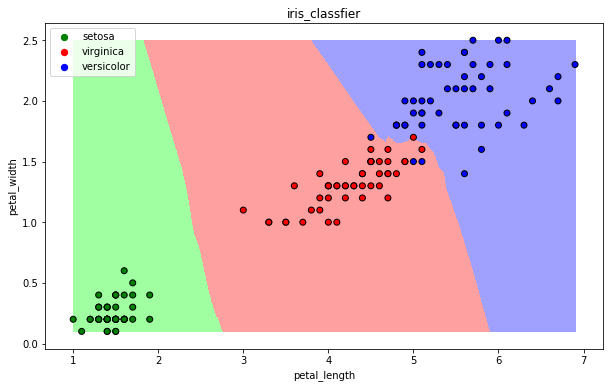

In [28]:
draw(clf)

## 2.朴素贝叶斯

#### （1）基本思想
当X=(x1,x2)即特征发生的时候，哪一个yk即输出发生的概率最大

#### （2）sklearn实现

In [39]:
from sklearn.naive_bayes import GaussianNB

构建分类器对象

In [62]:
clf = GaussianNB()
clf

GaussianNB(priors=None)

训练

In [63]:
clf.fit(iris_x_train,iris_y_train)

GaussianNB(priors=None)

预测

In [64]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [65]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


可视化

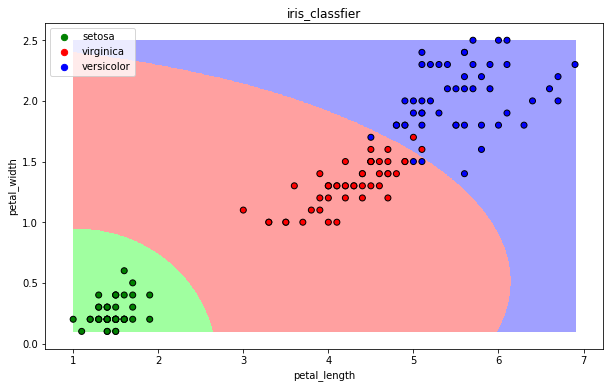

In [66]:
draw(clf)

## 3.决策树算法

#### （1）基本思想
CART算法：每次通过一个特征，将数据尽可能的分为纯净的两类，递归的分下去

#### （2）sklearn实现

In [44]:
from sklearn.tree import DecisionTreeClassifier

构建分类器对象

In [67]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

训练

In [68]:
clf.fit(iris_x_train,iris_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

预测

In [69]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [70]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：100%


可视化

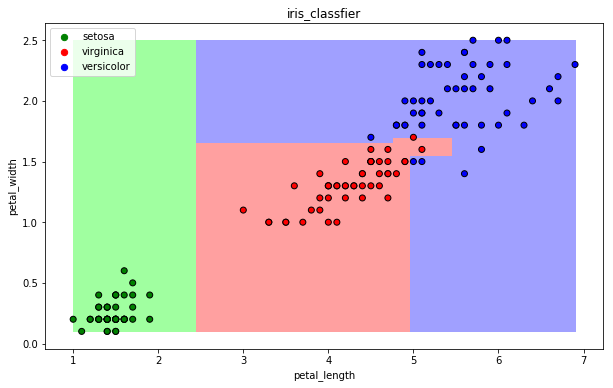

In [71]:
draw(clf)

## 4.逻辑回归算法

#### （1）基本思想
一种解释：

训练：通过一个映射方式，将特征X=（x1，x2）映射成P（y=ck），求使得所有概率之积最大化的映射方式里的参数

预测：计算P（y=ck）取概率最大的那个类别作为预测的对象

#### （2）sklearn实现

In [72]:
from sklearn.linear_model import LogisticRegression

构建分类器对象

In [74]:
clf = LogisticRegression(solver='saga',max_iter=1000)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

训练

In [75]:
clf.fit(iris_x_train,iris_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

预测

In [76]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [77]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


可视化

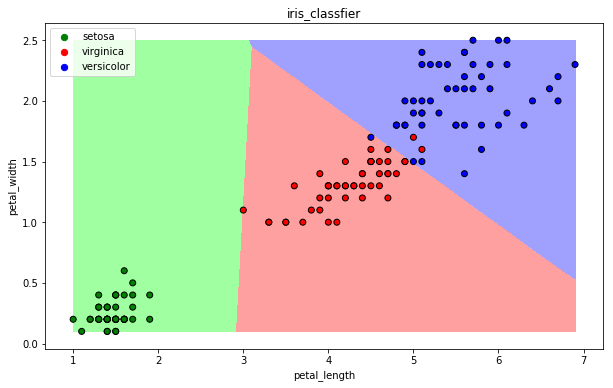

In [78]:
draw(clf)

## 5.支持向量机算法

#### （1）基本思想
以二分类为例，假设数据可以完全分开：用一个超平面将两类数据完全分开，且最近点到平面的距离最大

#### （2）sklearn实现

In [79]:
from sklearn.svm import SVC

构建分类器对象

In [80]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

训练

In [81]:
clf.fit(iris_x_train,iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

预测

In [82]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [83]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


可视化

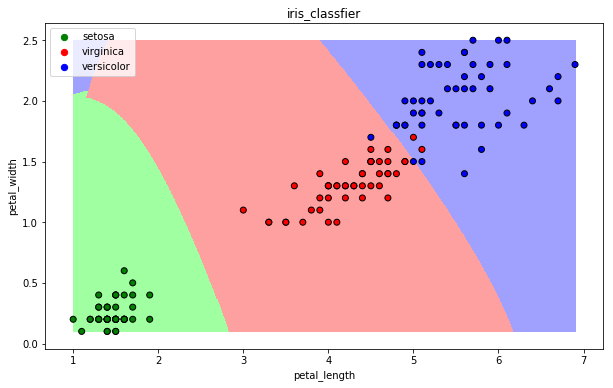

In [84]:
draw(clf)

## 6.集成方法----随机森林

#### （1）基本思想
训练集m，有放回的随机抽取m个数据，构成一组，共抽取n组采样集；

n组采样集训练得到n个弱分类器(弱分类器一般用决策树或神经网络),将n个弱分类器进行组合得到强分类器

#### （2）sklearn实现

In [85]:
from sklearn.ensemble import RandomForestClassifier

构建分类器对象

In [86]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

训练

In [87]:
clf.fit(iris_x_train,iris_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

预测

In [88]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [70]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：100%


可视化

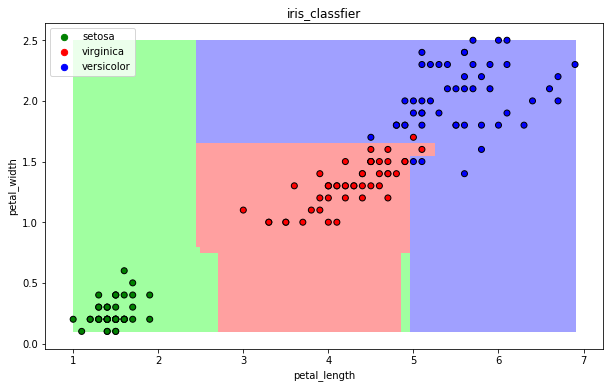

In [90]:
draw(clf)

## 7.集成方法----Adaboost

#### （1）基本思想
训练集m，用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重，使用心得权重训练得到第二个弱分类器，以此类推，根据各自系数，将所有的弱分类器加权求和获得强分类器

#### （2）sklearn实现

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

构建分类器对象

In [102]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [97]:
#clf = AdaBoostClassifier(base_estimator=GaussianNB())
#clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GaussianNB(priors=None), learning_rate=1.0,
          n_estimators=50, random_state=None)

训练

In [103]:
clf.fit(iris_x_train,iris_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

预测

In [104]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [105]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


可视化

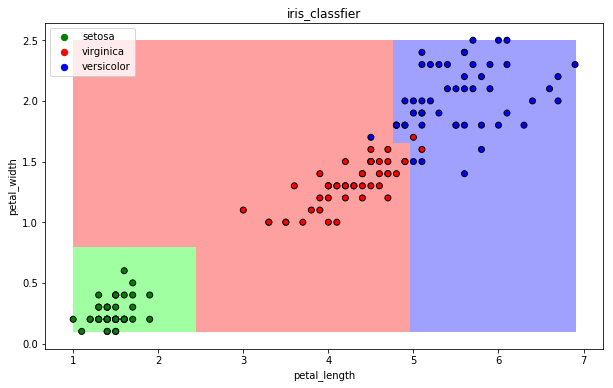

In [106]:
draw(clf)

## 8.集成方法----梯度提升树GBDT

#### （1）基本思想
训练集m，获得第一个弱分类器，获得残差，然后不断的拟合残差，所有弱分类器相加得到强分类器

#### （2）sklearn实现

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

构建分类器对象

In [108]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

训练

In [109]:
clf.fit(iris_x_train,iris_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

预测

In [110]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 2 1 0 0 2 1 2 0 0 1 2 2 2]
[1 1 2 0 0 1 0 2 2 1 2 0 1 2 0 2 2 1 1 0 0 2 1 2 0 0 1 2 2 2]


评估

In [111]:
accuracy = clf.score(iris_x_test,iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


可视化

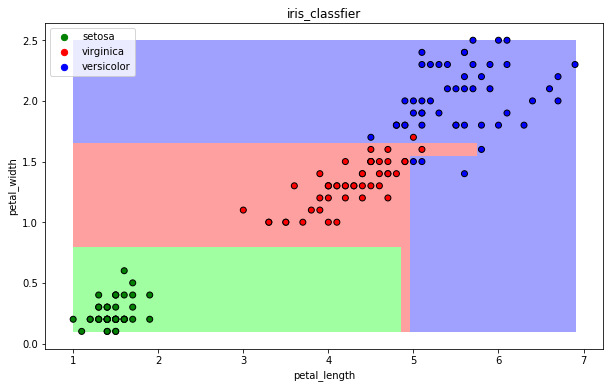

In [112]:
draw(clf)